### Test migration history reconstruction on ovarian cancer data

In [1]:
import sys
import os
from metient.util.globals import *
from metient.metient import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [3, 3]
custom_colors = ["#6aa84f","#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#9e9e9e"]

repo_dir = os.path.join(os.getcwd(), "../")
MSK_MET_FN = os.path.join(repo_dir, 'data/msk_met/msk_met_freq_by_cancer_type.csv')
      
MCPHERSON_DATA_DIR = os.path.join(repo_dir, 'data', 'mcpherson_ovarian_2016')
TREE_DIR = os.path.join(MCPHERSON_DATA_DIR, 'orchard_trees')    
TSV_DIR = os.path.join(MCPHERSON_DATA_DIR, 'pyclone_clustered_tsvs')                 

OUTPUT_DIR = os.path.join(MCPHERSON_DATA_DIR, "metient_outputs")

PATIENT_IDS = [1,2,3,4,7,9]
print_config = PrintConfig(visualize=True, k_best_trees=6)


CUDA GPU: False


In [2]:
from metient.util import data_extraction_util as dutil

def run_evaluate(mut_trees_fn, ref_var_fn, weights, run_name):    
    _, _, _, unique_sites, _, _ = dutil.get_ref_var_omega_matrices(ref_var_fn)
    trees = get_adj_matrices_from_pairtree_results(mut_trees_fn)
    print("num trees:", len(trees))
    print(unique_sites)
   
    tree_num = 1
    for adj_matrix in trees[:1]:
        print(f"\nTREE {tree_num}")
        print(adj_matrix.shape)

        evaluate(adj_matrix, ref_var_fn, weights, print_config, OUTPUT_DIR, f"{run_name}_tree{tree_num}",
                 O=None, bias_weights=True, custom_colors=custom_colors, solve_polytomies=False)
        tree_num += 1


### Run all patients in evaluate mode

num trees: 48
['omentum_site', 'right_ovary_site', 'small_bowel_site']

TREE 1
torch.Size([30, 30])
Calculated batch size: 15616
Restructuring adjacency matrix for patient1_evaluate_tree1_right_ovary_site since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:304: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:295: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [01:12<00:00,  1.03it/s]


# final solutions: 6


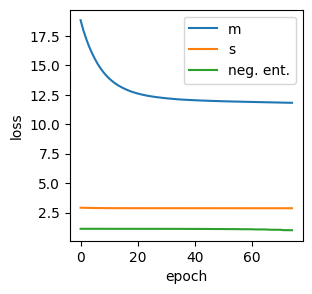

patient1_evaluate_tree1_right_ovary_site


<Figure size 300x300 with 0 Axes>

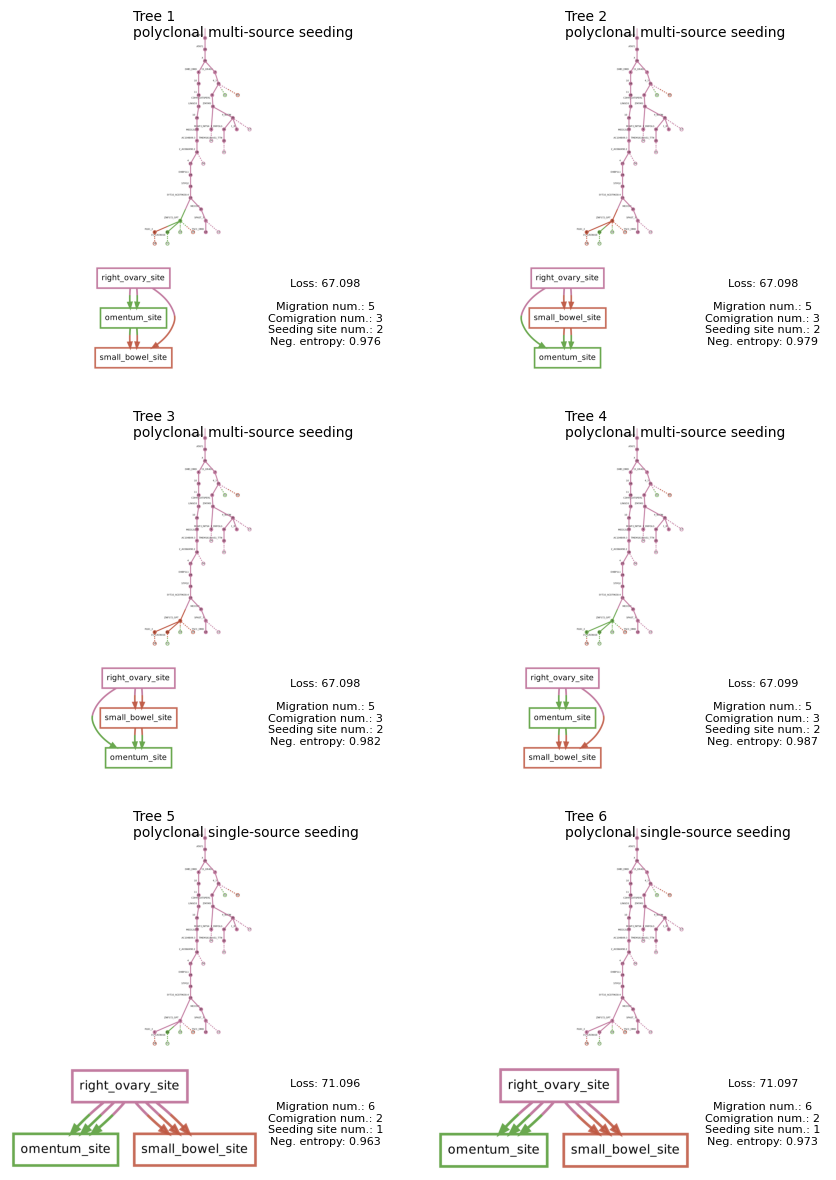

num trees: 16
['omentum_site', 'right_ovary_site']

TREE 1
torch.Size([14, 14])
Calculated batch size: 256
Restructuring adjacency matrix for patient2_evaluate_tree1_right_ovary_site since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:304: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:295: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:05<00:00, 12.51it/s]


# final solutions: 2


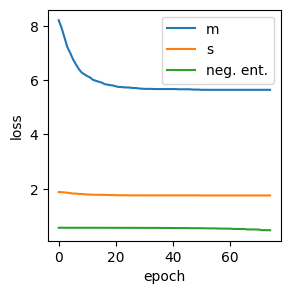

patient2_evaluate_tree1_right_ovary_site
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

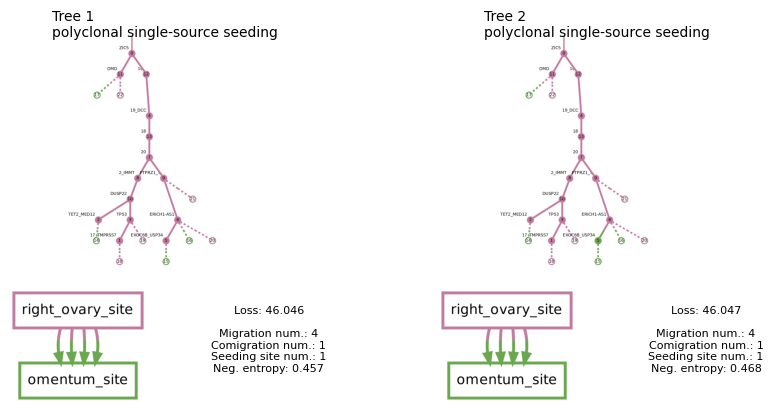

num trees: 52
['adnexa_site', 'omentum_site', 'right_ovary_site']

TREE 1
torch.Size([21, 21])
Calculated batch size: 10496
Restructuring adjacency matrix for patient3_evaluate_tree1_right_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:38<00:00,  1.96it/s]


# final solutions: 2


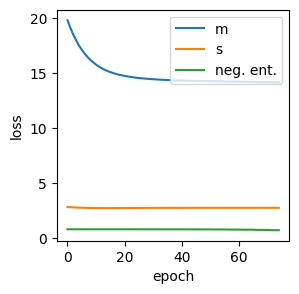

patient3_evaluate_tree1_right_ovary_site
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

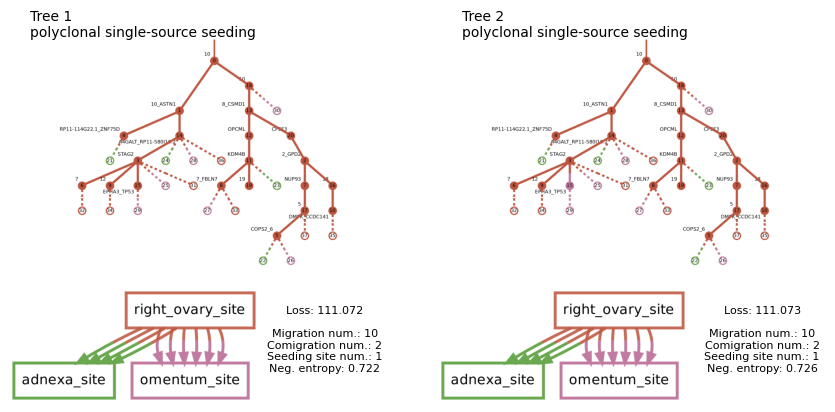

num trees: 10
['left_pelvic_sidewall_site', 'right_ovary_site']

TREE 1
torch.Size([23, 23])
Calculated batch size: 11520
Restructuring adjacency matrix for patient4_evaluate_tree1_right_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:35<00:00,  2.11it/s]


# final solutions: 1


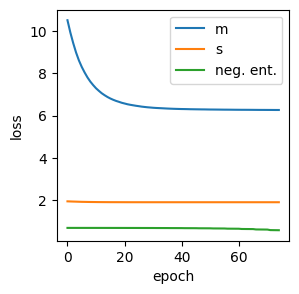

patient4_evaluate_tree1_right_ovary_site
6 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

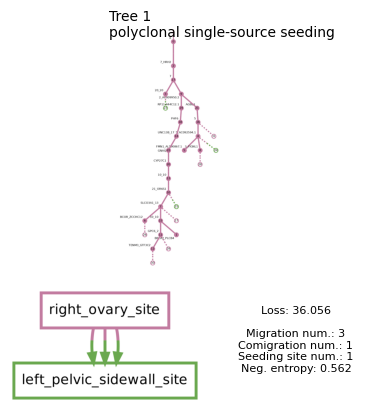

num trees: 59
['brain_metastasis', 'left_ovary_site', 'righ_pelvic_mass']

TREE 1
torch.Size([13, 13])
Calculated batch size: 256
Restructuring adjacency matrix for patient7_evaluate_tree1_left_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:00<00:00, 104.92it/s]


# final solutions: 6


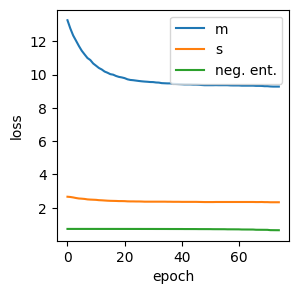

patient7_evaluate_tree1_left_ovary_site


<Figure size 300x300 with 0 Axes>

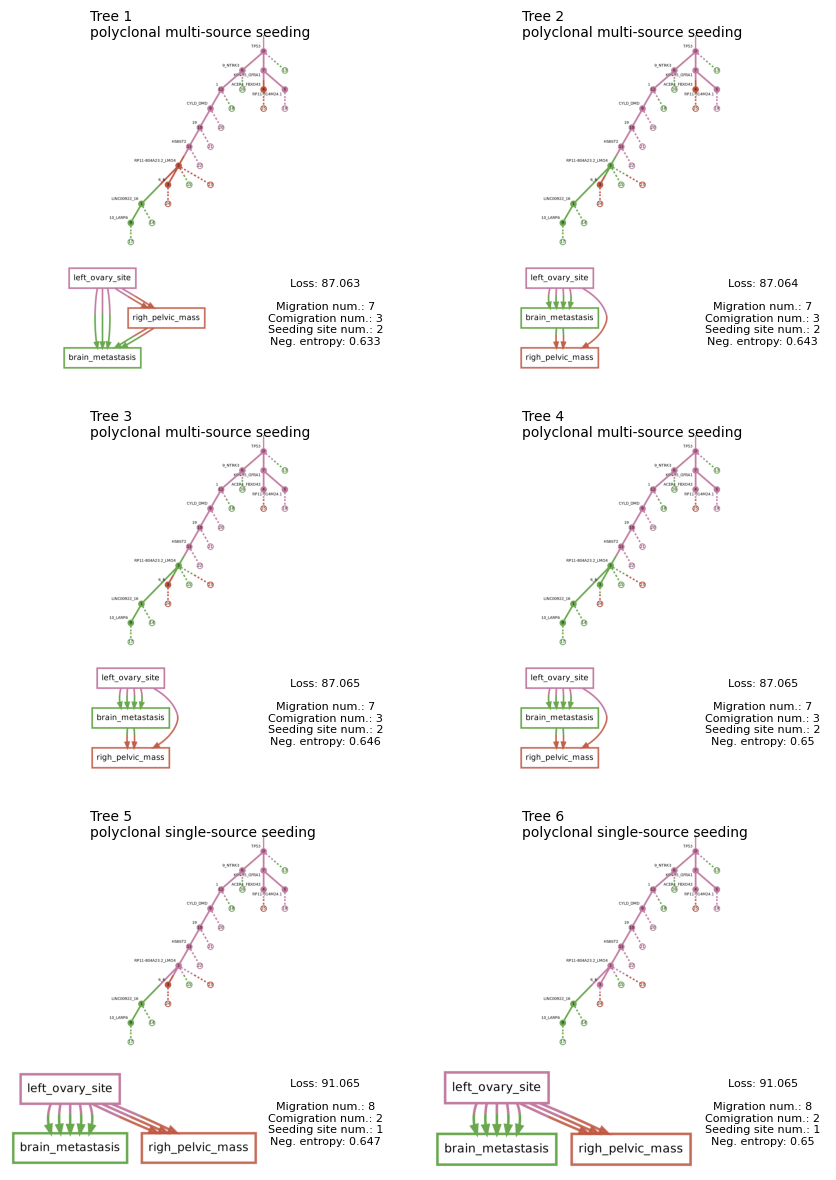

num trees: 1
['left_ovary_site', 'omentum_site', 'right_ovary_site']

TREE 1
torch.Size([10, 10])
Multiple primaries given. Running each as primary
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 122.01it/s]


# final solutions: 6


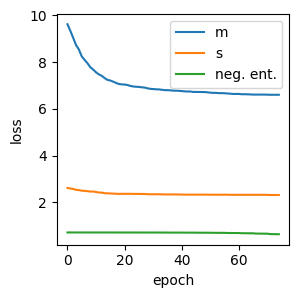

patient9_evaluate_tree1_left_ovary_site


<Figure size 300x300 with 0 Axes>

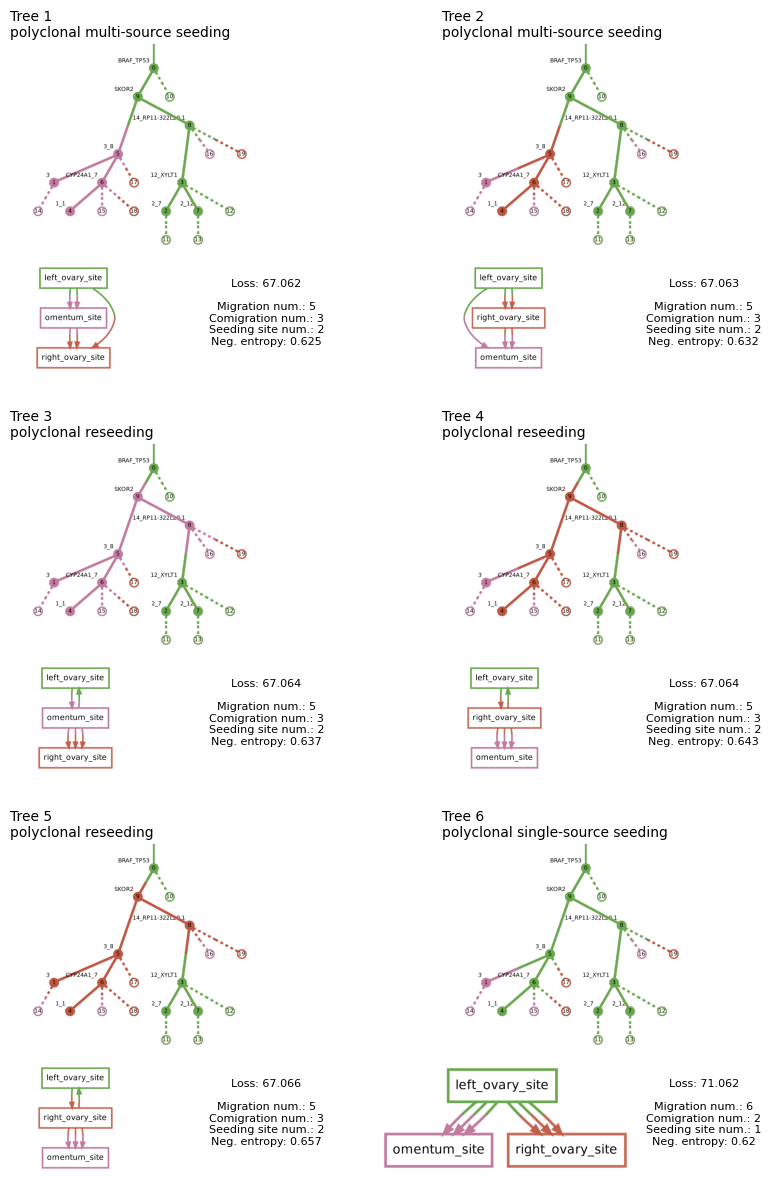

Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 105.32it/s]


# final solutions: 2


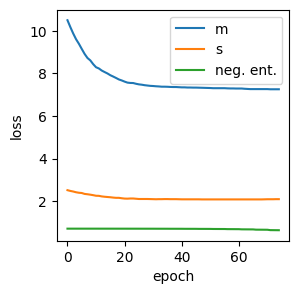

patient9_evaluate_tree1_right_ovary_site
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

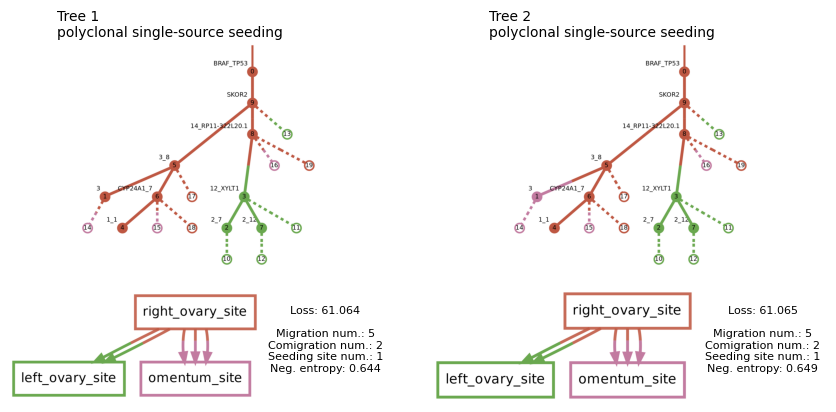

In [3]:
for patient_id in PATIENT_IDS:
    mut_trees_fn = os.path.join(TREE_DIR, f"patient{patient_id}.results.npz")
    ref_var_fn = os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv")
    weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, gen_dist=0.0, organotrop=0.0)
    
    run_evaluate(mut_trees_fn, ref_var_fn, weights, f"patient{patient_id}_evaluate")


### Run all patients in calibrate mode

Saving results to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/mcpherson_ovarian_2016/metient_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/mcpherson_ovarian_2016/metient_outputs/calibrate
Calibrating for patient: 1_calibrate
Calculated batch size: 19456
Restructuring adjacency matrix for 1_calibrate_right_ovary_site since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:26<00:00,  2.82it/s]


# final solutions: 8
Calibrating for patient: 2_calibrate
Calculated batch size: 256
Restructuring adjacency matrix for 2_calibrate_right_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:00<00:00, 171.29it/s]


# final solutions: 1
Calibrating for patient: 3_calibrate
Calculated batch size: 13056
Restructuring adjacency matrix for 3_calibrate_right_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:14<00:00,  5.19it/s]


No solutions without mistakes detected
# final solutions: 1
Calibrating for patient: 4_calibrate
Calculated batch size: 14336
Restructuring adjacency matrix for 4_calibrate_right_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:10<00:00,  6.98it/s]


# final solutions: 2
Calibrating for patient: 7_calibrate
Calculated batch size: 256
Restructuring adjacency matrix for 7_calibrate_left_ovary_site since root node is not at index 0


100%|██████████| 75/75 [00:00<00:00, 177.22it/s]


# final solutions: 5
Calibrating for patient: 9_calibrate
Multiple primaries given. Running each as primary
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 192.88it/s]


# final solutions: 4
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 189.78it/s]


# final solutions: 2
Calibrating to 7 patients
Optimized thetas: tensor([0.5139, 0.2430, 0.2430], grad_fn=<DivBackward0>)
1_calibrate_right_ovary_site


<Figure size 300x300 with 0 Axes>

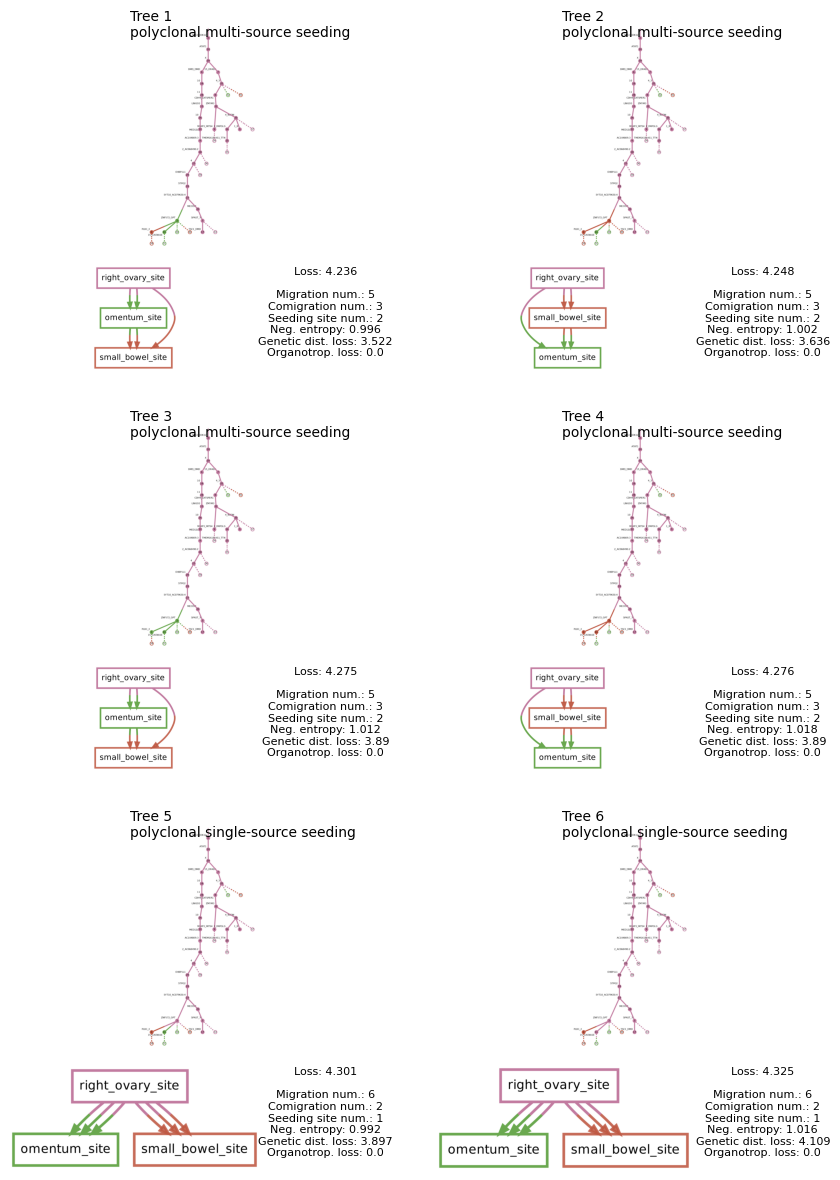

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)


2_calibrate_right_ovary_site
6 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

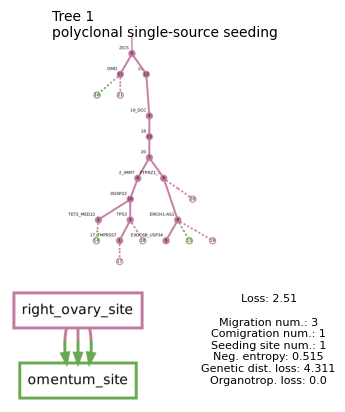

3_calibrate_right_ovary_site
6 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

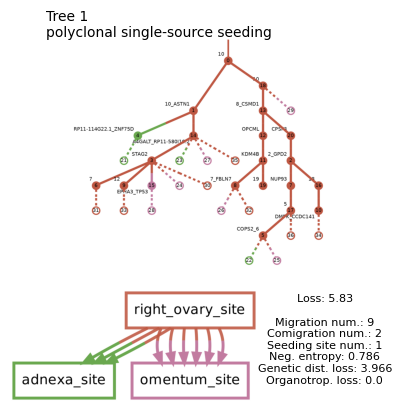

4_calibrate_right_ovary_site
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

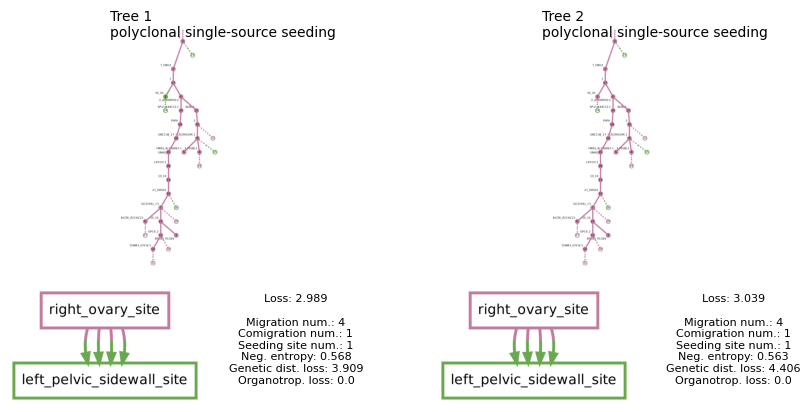

7_calibrate_left_ovary_site
6 unique trees were not found (5 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

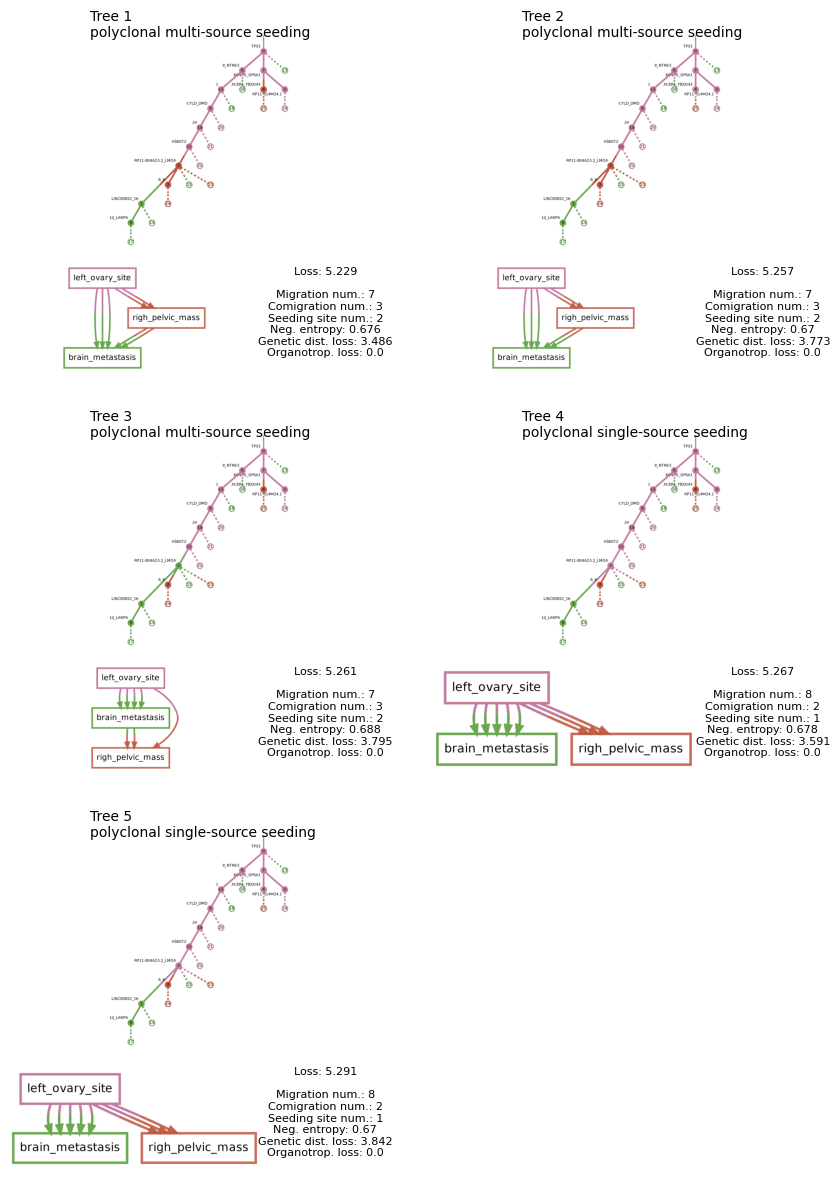

9_calibrate_left_ovary_site
6 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

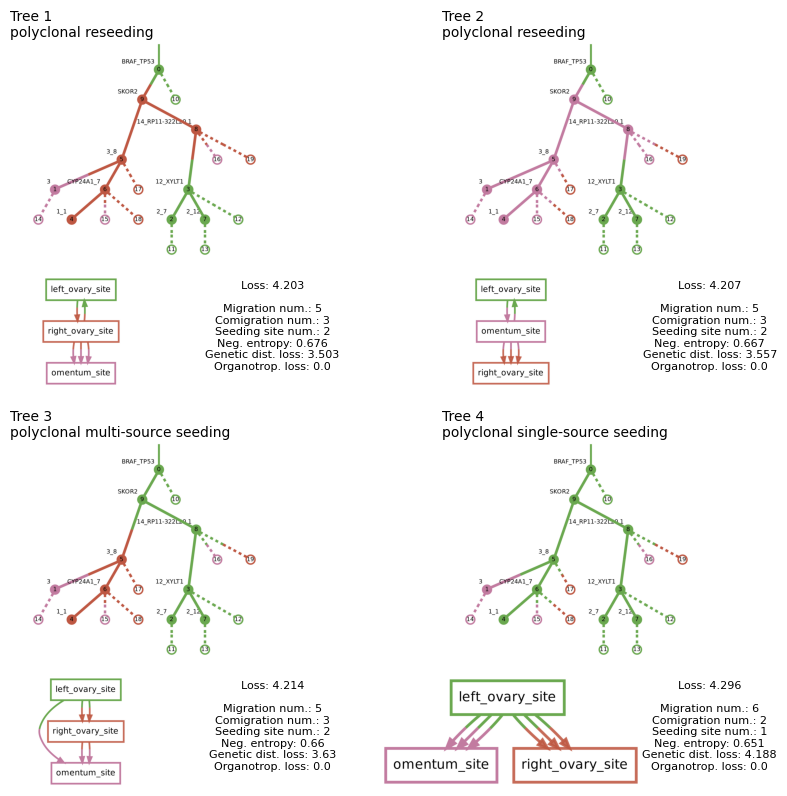

9_calibrate_right_ovary_site
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

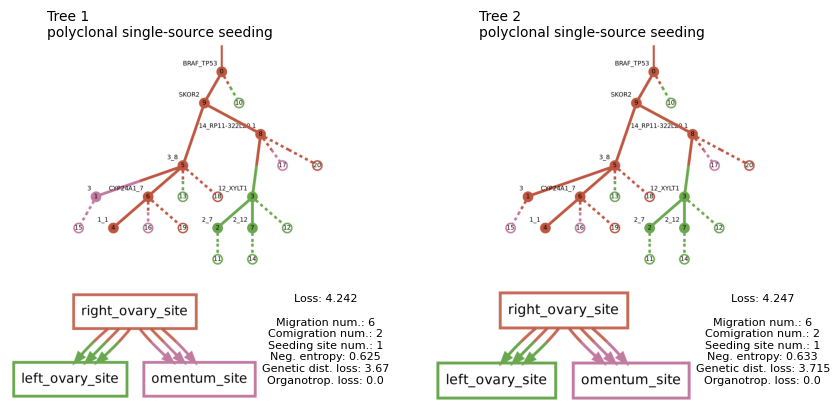

[0.5139009356498718, 0.24304957687854767, 0.24304956197738647]

In [3]:
mut_trees_fns = [os.path.join(TREE_DIR, f"patient{patient_id}.results.npz") for patient_id in PATIENT_IDS]
trees = [data[0] for data in get_adj_matrices_from_pairtree_results(mut_trees_fns)]
ref_var_fns = [os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv") for patient_id in PATIENT_IDS]
run_names = [f"{pid}_calibrate" for pid in PATIENT_IDS]
calibrate(trees, ref_var_fns, print_config, OUTPUT_DIR, run_names, bias_weights=True, custom_colors=custom_colors, solve_polytomies=False)